In [1]:
import numpy as np
import pandas as pd
import os
import pdb
from random import random
import math
import matplotlib.pyplot as plta
import pylab
import matplotlib.animation as animation
from scipy.spatial import distance
from scipy.spatial.distance import euclidean
from mpl_toolkits.mplot3d import Axes3D
def distance(p0, p1):
    return math.sqrt((p0[0] - p1[0])**2 + (p0[1] - p1[1])**2 +(p0[2] - p1[2])**2  )
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy
def count_xtal_waters(ROI, df, radius):
    ref_waters_in_OEC = []
    OEC_ROI = radius

    for n,rew in df.iterrows():
        point1= [float(df.loc[n,'x']),float(df.loc[n,'y']),float(df.loc[n,'z'])]

        point2= [float(ROI['x'].values[0]),float(ROI['y'].values[0]),float(ROI['z'].values[0])]
        if ((distance(point1,point2) < OEC_ROI )):
            ref_waters_in_OEC.append(df.loc[n])
    return len(ref_waters_in_OEC)

# Open up solvent peaks file

In [2]:
colspecs_pdb = [(0, 6), (6, 11), (12, 16), (16, 17), (17, 20), (21, 22), (22, 26),
            (26, 27), (30, 38), (38, 46), (46, 54), (54, 60), (60, 66), (76, 78),
            (78, 80)]


names_pdb = ['ATOM', 'serial', 'name', 'altloc', 'resname', 'chainid', 'resseq',
         'icode', 'x', 'y', 'z', 'occupancy', 'tempfactor', 'element', 'charge']

pdb_path = '/Users/yyk_lab/Downloads/peaks_p212121_55ns_SOL.pdb'
peaks = pd.read_fwf(pdb_path, names=names_pdb, colspecs=colspecs_pdb,skiprows=4)
peaks

,ATOM,serial,name,altloc,resname,chainid,resseq,icode,x,y,z,occupancy,tempfactor,element,charge
0,ATOM,8734.0,O,NaN,HOH,X,1.0,NaN,29.424,42.669,9.577,11.03,11.03,O,NaN
1,ATOM,18366.0,O,NaN,HOH,X,2.0,NaN,88.206,68.772,-9.577,11.03,11.03,O,NaN
2,ATOM,13738.0,O,NaN,HOH,X,3.0,NaN,60.157,-29.525,2.446,11.01,11.01,O,NaN
3,ATOM,3724.0,O,NaN,HOH,X,4.0,NaN,-2.913,70.665,36.875,10.83,10.83,O,NaN
4,ATOM,13042.0,O,NaN,HOH,X,5.0,NaN,55.868,40.776,-36.875,10.83,10.83,O,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26077,ATOM,5516.0,O,NaN,HOH,Z,6080.0,NaN,7.303,2.577,67.341,2.03,2.03,O,NaN
26078,ATOM,4910.0,O,NaN,HOH,Z,6081.0,NaN,121.591,23.868,-19.806,2.03,2.03,O,NaN
26079,ATOM,14133.0,O,NaN,HOH,Z,6082.0,NaN,62.810,87.573,19.806,2.03,2.03,O,NaN
26080,ATOM,4910.0,O,NaN,HOH,Z,6083.0,NaN,4.028,23.868,-19.806,2.03,2.03,O,NaN


In [3]:
peaks_in_roi = peaks.copy()

## Grab xtal waters

In [4]:
gro_path = '/Users/yyk_lab/Downloads/0F.pdb_fittedto55all.pdb'
reference = pd.read_fwf(gro_path, names=names_pdb, colspecs=colspecs_pdb, skiprows=4)
ref2=reference[(reference['resname']=='OOO') | (reference['resname']=='HOH')]
df_water =ref2
df_water

,ATOM,serial,name,altloc,resname,chainid,resseq,icode,x,y,z,occupancy,tempfactor,element,charge
16552,HETATM,16547.0,O,NaN,OOO,G,1.0,NaN,65.040,58.188,50.009,1.00,24.85,O,NaN
16553,HETATM,16548.0,O,NaN,OOO,G,2.0,NaN,19.655,54.694,51.414,1.00,35.38,O,NaN
16554,HETATM,16549.0,O,NaN,OOO,G,3.0,NaN,41.234,28.788,37.875,1.00,24.88,O,NaN
16555,HETATM,16550.0,O,NaN,OOO,G,4.0,NaN,34.385,54.734,27.038,1.00,28.43,O,NaN
16556,HETATM,16551.0,O,NaN,OOO,G,5.0,NaN,96.070,66.291,58.316,1.00,36.18,O,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52252,HETATM,52213.0,O,NaN,HOH,S,1796.0,NaN,22.830,59.185,-0.104,1.00,57.12,O,NaN
52253,HETATM,52214.0,O,NaN,HOH,S,1797.0,NaN,93.855,74.540,19.748,0.98,61.32,O,NaN
52254,HETATM,52215.0,O,NaN,HOH,S,1798.0,NaN,21.829,75.450,31.332,1.00,72.32,O,NaN
52255,HETATM,52216.0,O,NaN,HOH,S,1799.0,NaN,22.787,-59.484,21.536,1.00,65.81,O,NaN


## Define ROIs

In [5]:
#ROI of OEC
radius=15
ROI_OEC1 = reference[(reference['resname'] =='OEC') & (reference['chainid'] =='A') & (reference['name'] =='O1') ]
ROI_OEC2 = reference[(reference['resname'] =='OEC') & (reference['chainid'] =='a') & (reference['name'] =='O1') ]


# ROI of random bulk region
good_rando1=0 
while good_rando1== 0:
    value = random()
    scaled_value = 1 + (value * (1799))
    random_water1= int(scaled_value)
    ROI_bulk1 = reference[(reference['resname'] =='HOH') & (reference['resseq'] ==random_water1) ]
    dist1 =distance([float(ROI_OEC1['x'].values[0]),float(ROI_OEC1['y'].values[0]),float(ROI_OEC1['z'].values[0])], [float(ROI_bulk1['x'].values[0]),float(ROI_bulk1['y'].values[0]),float(ROI_bulk1['z'].values[0])])
    dist2 = distance([float(ROI_OEC2['x'].values[0]),float(ROI_OEC2['y'].values[0]),float(ROI_OEC2['z'].values[0])], [float(ROI_bulk1['x'].values[0]),float(ROI_bulk1['y'].values[0]),float(ROI_bulk1['z'].values[0])])
    xtalcount=count_xtal_waters(ROI_bulk1, df_water, radius)
    if dist1 > 50 and dist2 > 50 and xtalcount > 25:
        print("Random water 1 = %d" %random_water1)
        print("Number of XTAL waters in ROI=%d" %xtalcount)
        good_rando1=1

print("Random water 1 distance to OEC1 is %0.2f" %dist1)
print("Random water 1 distance to OEC2 is %0.2f" %dist2)
print("***********")
good_rando2=0 
while good_rando2== 0:
    value = random()
    scaled_value = 1 + (value * (1799))
    random_water2= int(scaled_value)
    ROI_bulk2 = reference[(reference['resname'] =='HOH') & (reference['resseq'] ==random_water2) ]
    dist1 =distance([float(ROI_OEC1['x'].values[0]),float(ROI_OEC1['y'].values[0]),float(ROI_OEC1['z'].values[0])], [float(ROI_bulk2['x'].values[0]),float(ROI_bulk2['y'].values[0]),float(ROI_bulk2['z'].values[0])])
    dist2 = distance([float(ROI_OEC2['x'].values[0]),float(ROI_OEC2['y'].values[0]),float(ROI_OEC2['z'].values[0])], [float(ROI_bulk2['x'].values[0]),float(ROI_bulk2['y'].values[0]),float(ROI_bulk2['z'].values[0])])
    dist3 = distance([float(ROI_bulk2['x'].values[0]),float(ROI_bulk2['y'].values[0]),float(ROI_bulk2['z'].values[0])], [float(ROI_bulk1['x'].values[0]),float(ROI_bulk1['y'].values[0]),float(ROI_bulk1['z'].values[0])] )
    xtalcount=count_xtal_waters(ROI_bulk2, df_water, radius)
    if dist1 > 50 and dist2 > 50 and  dist3>50 and xtalcount > 25:
        print("Random water 2 = %d " %random_water2)
        print("Number of XTAL waters in ROI=%d" %xtalcount)
        good_rando2=1

print("Random water 2 distance to OEC1 is %0.2f" %dist1)
print("Random water 2 distance to OEC2 is %0.2f" %dist2)
print("Random water 2 distance to random water 1 is %0.2f" %dist3)


Random water 1 = 731
Number of XTAL waters in ROI=30
Random water 1 distance to OEC1 is 52.60
Random water 1 distance to OEC2 is 82.80
***********
Random water 2 = 288 
Number of XTAL waters in ROI=32
Random water 2 distance to OEC1 is 58.17
Random water 2 distance to OEC2 is 54.04
Random water 2 distance to random water 1 is 61.44


# Select ROI for calculation 

In [15]:
OEC='Rand2'
if OEC==1:
    ROI = ROI_OEC1
elif OEC==2:
    ROI=ROI_OEC2
elif OEC=='Rand1':
    ROI=ROI_bulk1
else: 
    ROI=ROI_bulk2

# Make list of XTAL waters found in ROI

In [16]:
ref_waters_in_OEC = []
    
for n,rew in df_water.iterrows():
    point1= [float(df_water.loc[n,'x']),float(df_water.loc[n,'y']),float(df_water.loc[n,'z'])]
  
    point2= [float(ROI['x'].values[0]),float(ROI['y'].values[0]),float(ROI['z'].values[0])]
    if ((distance(point1,point2) < radius )):
        ref_waters_in_OEC.append(df_water.loc[n])

ref_waters_in_OEC=pd.DataFrame(ref_waters_in_OEC)
print(len(ref_waters_in_OEC))

32


# Make list of peaks in ROI

In [17]:
peaks_in_OEC=[]
for z,ruw in peaks_in_roi.iterrows():
    point1= [float(peaks_in_roi.loc[z,'x']),float(peaks_in_roi.loc[z,'y']),float(peaks_in_roi.loc[z,'z'])]
    point2= [float(ROI['x'].values[0]),float(ROI['y'].values[0]),float(ROI['z'].values[0])]
    if ((distance(point1,point2) < radius) ):
        peaks_in_OEC.append(peaks_in_roi.loc[z])
peaks_in_OEC=pd.DataFrame(peaks_in_OEC)
peaks_in_OEC 

,ATOM,serial,name,altloc,resname,chainid,resseq,icode,x,y,z,occupancy,tempfactor,element,charge
9,ATOM,16105.0,O,NaN,HOH,X,10.0,NaN,74.410,-15.866,20.809,10.71,10.71,O,NaN
45,ATOM,15478.0,O,NaN,HOH,X,46.0,NaN,70.595,-16.904,29.682,10.31,10.31,O,NaN
106,ATOM,16195.0,O,NaN,HOH,X,107.0,NaN,74.748,0.302,23.243,10.12,10.12,O,NaN
194,ATOM,15385.0,O,NaN,HOH,X,195.0,NaN,69.954,-11.312,20.870,9.96,9.96,O,NaN
209,ATOM,15476.0,O,NaN,HOH,X,210.0,NaN,70.441,-14.865,27.645,9.93,9.93,O,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22766,ATOM,18385.0,O,NaN,HOH,Z,2769.0,NaN,88.085,-19.718,29.230,2.30,2.30,O,NaN
23675,ATOM,18181.0,O,NaN,HOH,Z,3678.0,NaN,86.531,-15.943,36.372,2.22,2.22,O,NaN
23924,ATOM,18012.0,O,NaN,HOH,Z,3927.0,NaN,85.682,-21.834,28.915,2.20,2.20,O,NaN
24129,ATOM,17704.0,O,NaN,HOH,Z,4132.0,NaN,83.533,-5.817,40.941,2.18,2.18,O,NaN


## Find matches to MD peaks

In [18]:
matches= pd.DataFrame(columns=['XTAL ID', 'Closest MD Partner', 'Dist', 'Thresh'] ,dtype=object) #xtal waters
matches_all =pd.DataFrame(columns=['MD ID', 'Closest XTAL Partner', 'Dist', "Thresh"], dtype=object)  #md_peaks
dist_array=[]
partner_array=[]
strength_array=[]
peaks_in_OEC =pd.DataFrame( peaks_in_OEC)
ref_waters_in_OEC =pd.DataFrame( ref_waters_in_OEC )

peaks_array=peaks_in_OEC['resseq']
water_array=ref_waters_in_OEC['resseq']


for h,rhu in peaks_in_OEC.iterrows():
    point1= [float(peaks_in_OEC.loc[h,'x']),float(peaks_in_OEC.loc[h,'y']),float(peaks_in_OEC.loc[h,'z'])]
    dist=10000
    partner=0
    strength= peaks_in_OEC.loc[h,'occupancy']
    for z,r in ref_waters_in_OEC.iterrows():
        point2= [float(ref_waters_in_OEC.loc[z,'x']),float(ref_waters_in_OEC.loc[z,'y']),float(ref_waters_in_OEC.loc[z,'z'])]
        dist_try=distance(point1,point2)
        if dist_try <dist:
            dist=dist_try #update value
            partner= ref_waters_in_OEC.loc[z,'resseq']
    dist_array.append(dist)
    partner_array.append(partner)      
    strength_array.append(strength)
matches_all['MD ID'] = peaks_array
matches_all['Closest XTAL Partner'] = partner_array
matches_all['Dist'] = dist_array
matches_all['Thresh'] = strength_array



# Find matches to XTAL waters

In [19]:
dist_array=[]
partner_array=[]
strength_array=[]

for h,rhu in ref_waters_in_OEC.iterrows():
    point1= [float(ref_waters_in_OEC.loc[h,'x']),float(ref_waters_in_OEC.loc[h,'y']),float(ref_waters_in_OEC.loc[h,'z'])]
    dist=10000
    partner=0
    strength=0
    for z,r in peaks_in_OEC.iterrows():
        point2= [float(peaks_in_OEC.loc[z,'x']),float(peaks_in_OEC.loc[z,'y']),float(peaks_in_OEC.loc[z,'z'])]
        dist_try=distance(point1,point2)
        if dist_try <dist:
            dist=dist_try #update value
            partner= peaks_in_OEC.loc[z,'resseq']
            strength=peaks_in_OEC.loc[z,'occupancy']
    dist_array.append(dist)
    partner_array.append(partner)   
    strength_array.append(strength)     

matches['XTAL ID'] = water_array
matches['Closest MD Partner'] = partner_array
matches['Dist'] = dist_array
matches['Thresh'] = strength_array


In [20]:
pr=pd.DataFrame(columns=('thresh', 'recall', 'precision', 'f1'), dtype=object) #precision/recall dataframe 0.5 dist
pr2=pd.DataFrame(columns=('thresh', 'recall', 'precision', 'f1'), dtype=object) #precision/recall dataframe 1.0 dist
pr3=pd.DataFrame(columns=('thresh', 'recall', 'precision', 'f1'), dtype=object) #precision/recall dataframe 1.4 dist
npr = 100 #number of precision/recall peaks we want 
df1=matches_all
df2=matches

pmax = np.max(df1['Thresh']) 
pmin = np.min(df1['Thresh']) 

df1= df1.sort_values(by=['Dist']) 
df2 = df2.sort_values(by=['Dist'])
df1_copy = df1.copy()
df2_copy = df2.copy()
df1_copy

,MD ID,Closest XTAL Partner,Dist,Thresh
1820,1821.0,812.0,0.094207,8.19
1354,1355.0,241.0,0.177124,8.67
2125,2126.0,1345.0,0.183014,7.88
2951,2952.0,1226.0,0.195453,7.26
4014,4015.0,445.0,0.206189,6.65
...,...,...,...,...
8069,8070.0,1345.0,8.175224,4.84
20361,364.0,445.0,8.311282,2.53
15800,5802.0,1345.0,8.677557,3.05
24970,4973.0,1774.0,9.059492,2.11


In [21]:
z=0
distances = [0.5,1.0,1.4]

pr_array=[pr,pr2,pr3]
all_pr=[]
for pr_all in pr_array:

    dist= distances[z]
    print(dist)

    for j in range(1,101): #only calculating 100 precision/recalls
        thresh= (pmax-pmin)/npr*(j-1)+pmin
        n=0
        t=0
        nt=0
        r=0
        s=0
        s1=0
        f=0
        ns = len(matches)
  
#######################################

        for i in range(0,len(df1_copy)): 
            if (df1_copy['Thresh'].values[i] >= thresh):
                nt=nt+1
                if(df1_copy['Dist'].values[i] <= dist):
                    n=n+1

        if (n > 0):
            p=n/nt

        for k in range(0, len(df2_copy)):

            if (df2_copy['Thresh'].values[k] >= thresh):
                if (df2_copy['Dist'].values[k] <= dist):
                    t=t+1


        if (t> 0):
            r=t/ns 
        f= 2*r*p/(r+p)     #f1 score is harmonc    

        pr_all.loc[j]=[thresh, r, p,f]
         
    all_pr.append(pr_all)
    z=z+1

0.5
1.0
1.4


# If you already have dataframes you want to load up


In [22]:
# all_pr=[]
# random_water1= 48
# radius=15

# OEC='Rand1'

# a = pd.read_pickle("precision_recall_random_water_%d_radius_%d_0.5.pkl" %(random_water1, radius))
# b = pd.read_pickle("precision_recall_random_water_%d_radius_%d_1.0.pkl" %(random_water1, radius))
# c = pd.read_pickle("precision_recall_random_water_%d_radius_%d_1.4.pkl" %(random_water1, radius))

# all_pr.append(a)
# all_pr.append(b)
# all_pr.append(c)

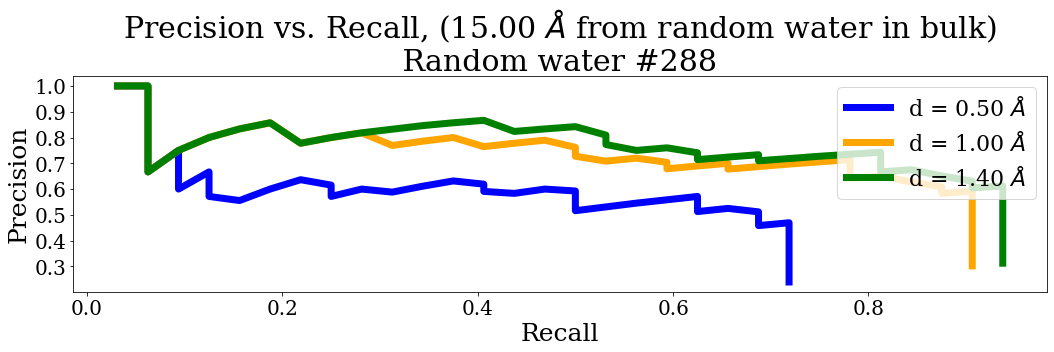

In [23]:
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
fig = plt.figure(figsize=[15,5])
plt.plot(all_pr[0].recall, all_pr[0].precision, color ='blue',  linewidth=7,label = "d = %0.2f $\AA$ " %distances[0])
plt.plot(all_pr[1].recall, all_pr[1].precision, color = 'orange',  linewidth=7, label = "d = %0.2f $\AA$" %distances[1])
plt.plot(all_pr[2].recall, all_pr[2].precision, color ='green',  linewidth=7, label = "d = %0.2f $\AA$"%distances[2] )

plt.legend(loc=1, prop={'size': 22})

if OEC ==1 or OEC ==2:
    if OEC==1:
        chain ='G'
    else:
        chain ='g'
    plt.title('Reference: \nPrecision vs. Recall, (%0.2f $\AA$ from OEC), Chain %s' %(radius, chain),fontsize=30)
elif OEC=='Rand1':
    randy = random_water1
    plt.title('Precision vs. Recall, (%0.2f $\AA$ from random water in bulk)\n Random water #%d ' %(radius,randy),fontsize=30)
else:
    randy = random_water2
    plt.title('Precision vs. Recall, (%0.2f $\AA$ from random water in bulk)\n Random water #%d ' %(radius,randy),fontsize=30)

    
  
plt.xlabel('Recall', fontsize=25)
plt.ylabel('Precision',  fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('pr_rand.pdf')

## Save dataframe to pickle! 

In [24]:
if OEC=="Rand1":
    randy = random_water1
    all_pr[0].to_pickle("precision_recall_random_water_%d_radius_%d_0.5.pkl" %(randy, radius))
    all_pr[1].to_pickle("precision_recall_random_water_%d_radius_%d_1.0.pkl" %(randy, radius))
    all_pr[2].to_pickle("precision_recall_random_water_%d_radius_%d_1.4.pkl" %(randy, radius))
elif OEC=='Rand2':
    randy = random_water2
    all_pr[0].to_pickle("precision_recall_random_water_%d_radius_%d_0.5.pkl" %(randy, radius))
    all_pr[1].to_pickle("precision_recall_random_water_%d_radius_%d_1.0.pkl" %(randy, radius))
    all_pr[2].to_pickle("precision_recall_random_water_%d_radius_%d_1.4.pkl" %(randy, radius))

elif OEC==1:
    all_pr[0].to_pickle("precision_recall_OEC1_radius_%d_0.5.pkl" %(radius))
    all_pr[1].to_pickle("precision_recall_OEC1_radius_%d_1.0.pkl" %(radius))
    all_pr[2].to_pickle("precision_recall_OEC1_radius_%d_1.4.pkl" %(radius))
else:
    all_pr[0].to_pickle("precision_recall_OEC2_radius_%d_0.5.pkl" %(radius))
    all_pr[1].to_pickle("precision_recall_OEC2_radius_%d_1.0.pkl" %(radius))
    all_pr[2].to_pickle("precision_recall_OEC2_radius_%d_1.4.pkl" %(radius))

,thresh,recall,precision,f1
1,2.0400,0.269231,0.050360,0.084848
2,2.1206,0.269231,0.053030,0.088608
3,2.2012,0.269231,0.054264,0.090323
4,2.2818,0.269231,0.056000,0.092715
5,2.3624,0.269231,0.058333,0.095890
...,...,...,...,...
96,9.6970,0.076923,1.000000,0.142857
97,9.7776,0.076923,1.000000,0.142857
98,9.8582,0.076923,1.000000,0.142857
99,9.9388,0.076923,1.000000,0.142857
